In [1]:
import os
import charts_function_list

In [2]:
base_path, data, outputs = charts_function_list.folder_setup()

In [4]:
os.chdir(data)
dc_ratings = pd.read_csv('dc_movie_ratings.csv')

In [19]:
colors = {'WB Batman':'#1b9e77',
         'Dark Knight Trilogy':'#66a61e',
         'DC Extended Universe':'#d95f02',
         'Superman':'#7570b3',
         'Other':'#636363'}

In [21]:
dc_ratings['color']=dc_ratings['Franchise'].map(colors)

In [25]:
dc_ratings

,Movie,Franchise,Complex Rank,IMDB rating,IMDB rank,Rotten Tomato rating,RT Rank,Metacritic rating,Metacritic Rank,color
0,Batman,WB Batman,3,7.6,5,72,9,69.0,8.0,#1b9e77
1,Batman & Robin,WB Batman,13,3.7,17,11,18,28.0,16.0,#1b9e77
2,Batman Begins,Dark Knight Trilogy,4,8.3,3,84,6,70.0,7.0,#66a61e
3,Batman Forever,WB Batman,9,5.4,14,40,11,51.0,11.0,#1b9e77
4,Batman Returns,WB Batman,5,7.0,8,80,7,68.0,9.0,#1b9e77
5,Batman vs Superman,DC Extended Universe,12,6.7,10,28,12,44.0,12.0,#d95f02
6,Catwoman,Other,18,3.3,19,9,19,27.0,17.0,#636363
7,Green Lantern,Other,19,5.6,13,26,13,39.0,15.0,#636363
8,Man of Steel,DC Extended Universe,10,7.1,7,55,10,55.0,10.0,#d95f02
9,Steel,Other,17,2.8,20,12,16,NaN,NaN,#636363


In [33]:
dc_ratings = dc_ratings[['Movie','Franchise','Complex Rank','IMDB rank','RT Rank','Metacritic Rank','color']].set_index(('Movie'))

In [36]:
dc_ratings

,Franchise,Complex Rank,IMDB rank,RT Rank,Metacritic Rank,color
Movie,,,,,,
Batman,WB Batman,3,5,9,8.0,#1b9e77
Batman & Robin,WB Batman,13,17,18,16.0,#1b9e77
Batman Begins,Dark Knight Trilogy,4,3,6,7.0,#66a61e
Batman Forever,WB Batman,9,14,11,11.0,#1b9e77
Batman Returns,WB Batman,5,8,7,9.0,#1b9e77
Batman vs Superman,DC Extended Universe,12,10,12,12.0,#d95f02
Catwoman,Other,18,19,19,17.0,#636363
Green Lantern,Other,19,13,13,15.0,#636363
Man of Steel,DC Extended Universe,10,7,10,10.0,#d95f02


In [39]:
ratings = dc_ratings[['Complex Rank','IMDB rank','RT Rank','Metacritic Rank']].T
colors = dc_ratings[['color']].T
franchises = dc_ratings[['Franchise']].T

In [92]:
colors.T.iloc[item,0]

'#1b9e77'

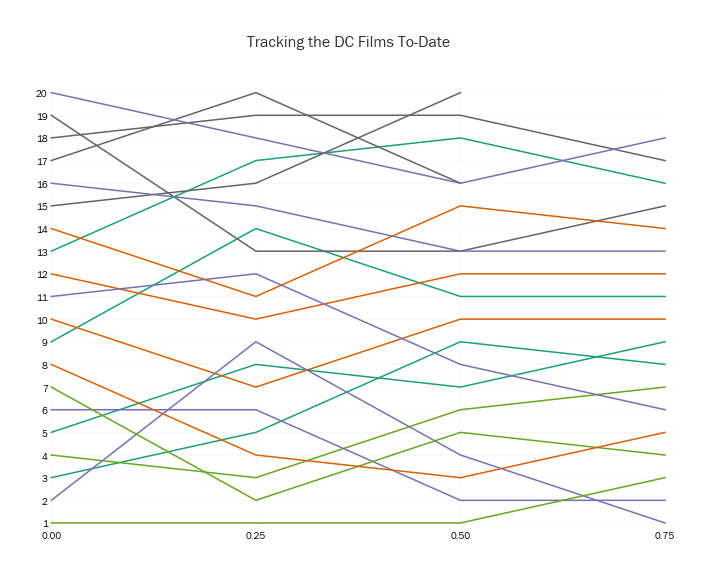

In [106]:
chart = charts_function_list.chart_maker(title='Tracking the DC Films To-Date')
fig = chart.initial_fig_axis()
ax = chart.axes_set_up(fig=fig)
for item in range(20):
    plt.plot([0,.25,.5,.75],ratings.iloc[:,item],color=colors.T.iloc[item,0],label=franchises.T.iloc[item,0],clip_on=False)
chart.x_axis_setup(ax,0,.75,.25)
chart.y_axis_setup(ax,.8,20,1)
#ax.tick_params(pad=20)
#ax.legend()
plt.show()

In [57]:
chart = charts_function_list.chart_maker()
fig = chart.initial_fig_axis()
ax = chart.axes_set_up()

In [ ]:
fig = chart.initial_fig_axis()
ax = chart.axes_set_up()